<a href="https://colab.research.google.com/github/Leonkeneddy86/Analisis-Covid-19-/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import: Es el comando que le dice a Python "Ve a buscar esta herramienta".

pandas: Es el nombre de la librería que queremos traer.

as pd: Esto es un alias. En lugar de escribir pandas cada vez que queramos usarla, le ponemos un apodo corto: pd. Es un estándar en la industria; todo el mundo lo llama pd

In [160]:
import pandas as pd

In [161]:
df = pd.read_csv("all-states-history.csv")
df.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110


Inspección de la Estructura

df.shape (La Forma):

Concepto: Piensa en esto como preguntar: "¿De qué tamaño es nuestra tabla?". Devuelve una tupla (filas, columnas). El primer número son las observaciones (filas o días/estados en este caso) y el segundo número son las variables (columnas o características).

df.info() (El Reporte de Calidad):

Concepto: Este es nuestro reporte más importante. Nos dice, columna por columna, tres cosas fundamentales:

Tipo de dato (Dtype): ¿Python lo está interpretando como texto (object), número entero (int64), número decimal (float64) o fecha? Esto es crucial.

Valores No Nulos (Non-Null Count): ¿Cuántas celdas tienen datos en esa columna? Si este número es menor que el número total de filas, significa que hay valores perdidos o valores nulos (NaN).

In [162]:
# Muestra el tamaño del DataFrame (filas, columnas)
print(df.shape)

# Muestra un resumen de cada columna: nombre, tipo de dato y valores no nulos.
df.info()

(20780, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20780 non-null  object 
 1   state                             20780 non-null  object 
 2   death                             19930 non-null  float64
 3   deathConfirmed                    9422 non-null   float64
 4   deathIncrease                     20780 non-null  int64  
 5   deathProbable                     7593 non-null   float64
 6   hospitalized                      12382 non-null  float64
 7   hospitalizedCumulative            12382 non-null  float64
 8   hospitalizedCurrently             17339 non-null  float64
 9   hospitalizedIncrease              20780 non-null  int64  
 10  inIcuCumulative                   3789 non-null   float64
 11  inIcuCurrently                    11636 non-null  float

Observa la salida de df.info(). Te enfocarás en dos columnas que son clave en este conjunto de datos (que es de seguimiento de COVID-19):

La columna date (fecha) 🗓️.

Las columnas que representan conteos como death, hospitalized, positive (casos, muertes, hospitalizados) 🔢.

la columna date se debera convertir a datatime, para el manejo de horas y fechas

Concepto Clave: Tipos de Datos 🏷️ Si la fecha se queda como object (texto), Pandas no la entiende como un punto en el tiempo. Sería como si Python viera "2021-03-07" simplemente como una secuencia de caracteres, no como algo que puede ordenar o sobre lo que puede calcular una tendencia. Para hacer un buen Análisis Exploratorio de Datos (EDA) y cumplir con la evaluación, la conversión es obligatoria.

Conversión de Tipo de Dato

Para solucionar esto, usamos la función pd.to_datetime() de Pandas.

df['date']: Estamos seleccionando la columna date de nuestro DataFrame. Piensa en esto como si le pusieras el dedo encima a esa columna específica en tu tabla.

pd.to_datetime(...): Es la receta mágica de Pandas que toma la columna de texto y la transforma en un formato de fecha reconocido.

df['date'] = ...: Esto es una reasignación. Tomamos la columna recién convertida y la guardamos de nuevo en el mismo lugar, sobrescribiendo la columna de texto original.

In [163]:
df["date"] = pd.to_datetime(df["date"])

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              20780 non-null  datetime64[ns]
 1   state                             20780 non-null  object        
 2   death                             19930 non-null  float64       
 3   deathConfirmed                    9422 non-null   float64       
 4   deathIncrease                     20780 non-null  int64         
 5   deathProbable                     7593 non-null   float64       
 6   hospitalized                      12382 non-null  float64       
 7   hospitalizedCumulative            12382 non-null  float64       
 8   hospitalizedCurrently             17339 non-null  float64       
 9   hospitalizedIncrease              20780 non-null  int64         
 10  inIcuCumulative                   3789 non-nul

la Limpieza de Datos, específicamente la Detección y Tratamiento de Valores Faltantes (o Valores Nulos, denotados como NaN en Pandas)

Concepto Clave: Valores Nulos (NaN) ❓ Piensa en un valor nulo como un hueco en tu tabla. Si una columna tiene muchos huecos, esa columna podría ser inútil para el análisis. Necesitamos saber la cantidad exacta de estos huecos.

Paso 5: Contar los Valores Faltantes
Aunque df.info() nos da una idea (las cuentas que no llegan al total de filas), queremos ver el número exacto, ordenado por columna.

Vamos a usar una combinación de comandos muy útil en Pandas:

df.isnull():

Le pregunta a Pandas, celda por celda: "¿Es esta celda nula?". Devuelve una tabla idéntica a df pero llena solo de True (si es nulo) o False (si no lo es).

.sum():

Como Python trata True como el número 1 y False como 0, al aplicar .sum() al resultado de isnull(), suma todos los Trues, dándonos el conteo total de valores nulos por cada columna.

In [165]:
# Cuenta el número de valores nulos por cada columna
df.isnull().sum()

,0
date,0
state,0
death,850
deathConfirmed,11358
deathIncrease,0
deathProbable,13187
hospitalized,8398
hospitalizedCumulative,8398
hospitalizedCurrently,3441
hospitalizedIncrease,0


Librerias para graficas, visualizaciones de datos faltantes

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


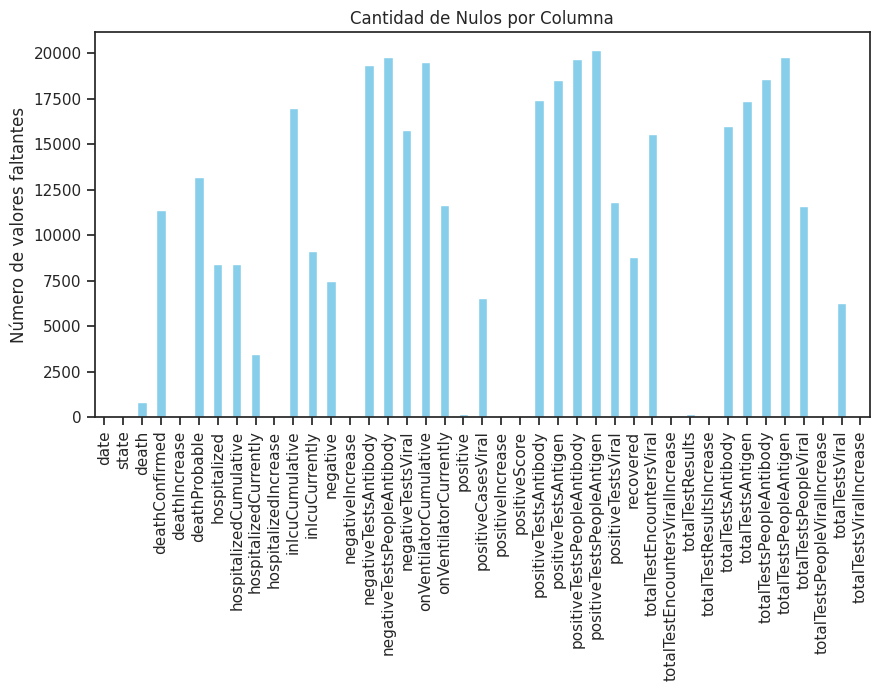

In [167]:
# Cuenta nulos y los grafica
df.isna().sum().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Cantidad de Nulos por Columna")
plt.ylabel("Número de valores faltantes")
plt.show()

Ver porcentaje exacto en %

In [168]:
# Calcula la media, multiplica por 100 y añade el símbolo %
porcentaje_nulos = (df.isna().mean() * 100).map("{:.2f}%".format)
print(porcentaje_nulos)


date                                 0.00%
state                                0.00%
death                                4.09%
deathConfirmed                      54.66%
deathIncrease                        0.00%
deathProbable                       63.46%
hospitalized                        40.41%
hospitalizedCumulative              40.41%
hospitalizedCurrently               16.56%
hospitalizedIncrease                 0.00%
inIcuCumulative                     81.77%
inIcuCurrently                      44.00%
negative                            36.04%
negativeIncrease                     0.00%
negativeTestsAntibody               92.98%
negativeTestsPeopleAntibody         95.32%
negativeTestsViral                  75.82%
onVentilatorCumulative              93.79%
onVentilatorCurrently               56.08%
positive                             0.90%
positiveCasesViral                  31.44%
positiveIncrease                     0.00%
positiveScore                        0.00%
positiveTes

Creacion de variable y eliminar columnas bajo un umbral

In [169]:
# 1. Recalculamos porcentajes
porcentajes_nulos = df.isnull().mean() * 100

# 2. Definimos el nuevo umbral del 40%
umbral_minimo = 40.0

# 3. Creamos la lista basada en el nuevo umbral
columnas_a_eliminar = porcentajes_nulos[porcentajes_nulos > umbral_minimo].index.tolist()

# 4. Eliminamos de forma permanente
df.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

print(f"Umbral aplicado: {umbral_minimo}%")
print(f"Número de columnas eliminadas: {len(columnas_a_eliminar)}")

Umbral aplicado: 40.0%
Número de columnas eliminadas: 23


# Parámetros de `drop` en Pandas

| Argumento | Propósito | Valor clave |
|-----------|-----------|-------------|
| `columns` | Especifica las columnas a eliminar. | Tu lista de columnas (`columnas_a_eliminar`). |
| `inplace` | Hace que la modificación se guarde permanentemente en el `df` original. | `True` |
`errors=ignore`  | El programa simplemente borra o salta los caracteres que no entiende y lee todo lo demás |


Vemos el tamaño nuevo usando shape

In [170]:
print(df.shape)

(20780, 18)


Generamos de nuevo la grafica y contamos los nulos

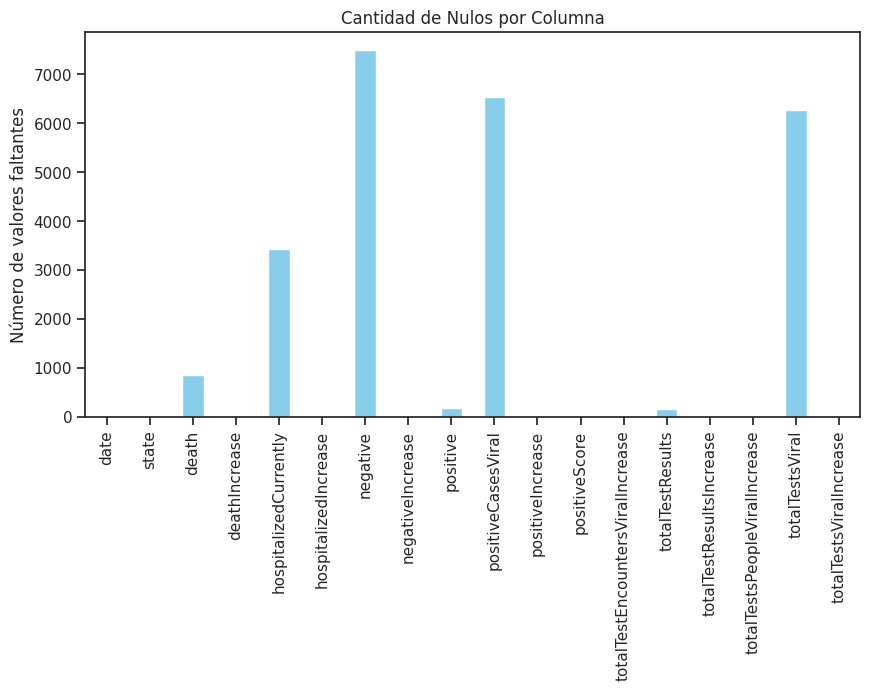

In [171]:
# Cuenta nulos y los grafica
df.isna().sum().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Cantidad de Nulos por Columna")
plt.ylabel("Número de valores faltantes")
plt.show()

Volvemos a ver los porcentajes

In [172]:
# Calcula la media, multiplica por 100 y añade el símbolo %
porcentaje_nulos = (df.isna().mean() * 100).map("{:.2f}%".format)
print(porcentaje_nulos)

date                                 0.00%
state                                0.00%
death                                4.09%
deathIncrease                        0.00%
hospitalizedCurrently               16.56%
hospitalizedIncrease                 0.00%
negative                            36.04%
negativeIncrease                     0.00%
positive                             0.90%
positiveCasesViral                  31.44%
positiveIncrease                     0.00%
positiveScore                        0.00%
totalTestEncountersViralIncrease     0.00%
totalTestResults                     0.80%
totalTestResultsIncrease             0.00%
totalTestsPeopleViralIncrease        0.00%
totalTestsViral                     30.14%
totalTestsViralIncrease              0.00%
dtype: object


calcular la matriz de correlación es una herramienta fundamental en el Análisis Exploratorio de Datos (EDA) porque nos permite ver, de un vistazo, cómo se mueven las variables entre sí.



# La Matriz de correlacion

La correlación mide la relación estadística entre dos variables numéricas. El resultado siempre es un número entre -1 y 1:

1: Correlación positiva perfecta (si una sube, la otra también).

0: No hay relación lineal.

-1: Correlación negativa perfecta (si una sube, la otra baja).

Para visualizar esto de forma profesional (como un mapa de calor), seguiremos estos pasos:

Calcular la matriz: Usamos df.corr().

Visualizar: Usamos la librería seaborn para crear un Heatmap.

# Parametros de Heatmap



annot=True: Escribe el número de la correlación dentro de cada cuadro.

cmap='coolwarm': Usa azul para correlaciones negativas y rojo para las positivas.

fmt=".2f": Muestra solo dos decimales para que sea fácil de leer.

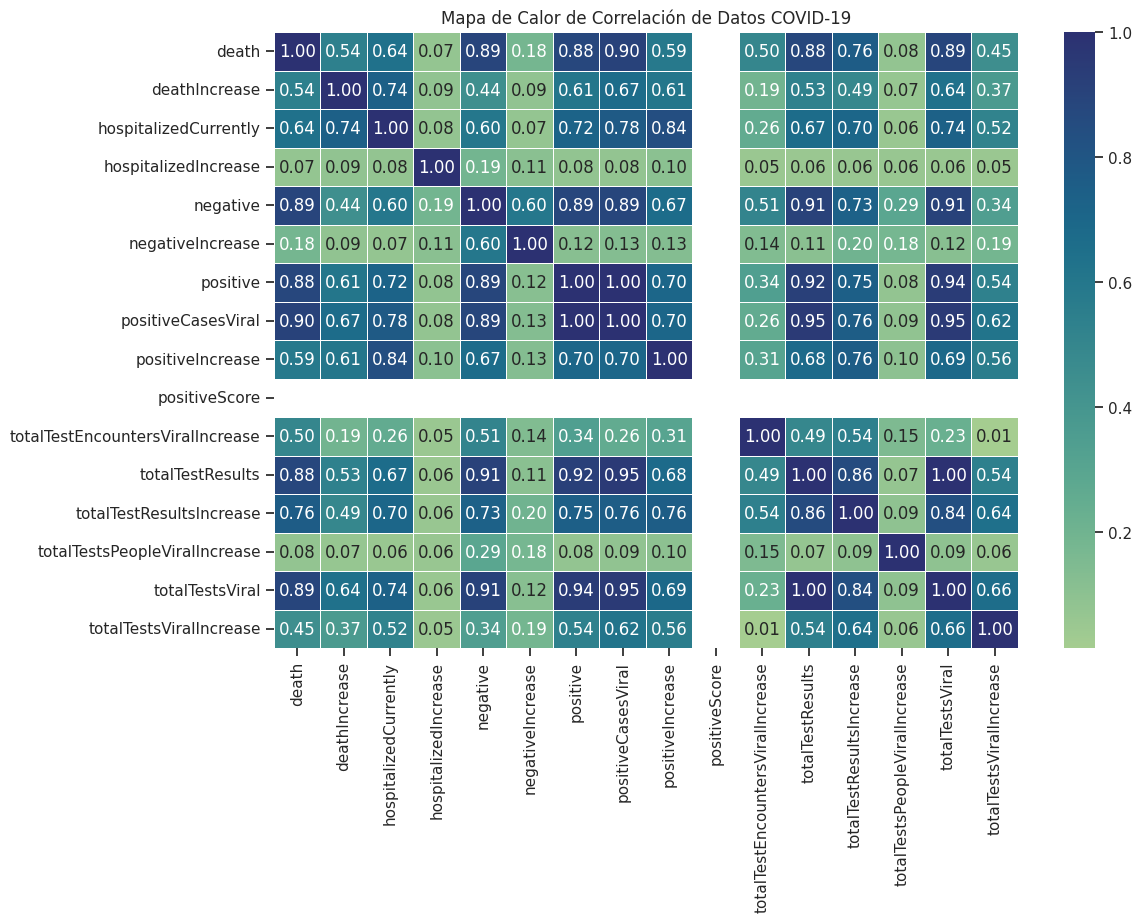

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculamos la matriz de correlación
# Usamos numeric_only=True para que solo tome las columnas con números
matriz_corr = df.corr(numeric_only=True)

# 2. Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 8))

# 3. Creamos el mapa de calor (Heatmap)
sns.heatmap(matriz_corr, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)

plt.title("Mapa de Calor de Correlación de Datos COVID-19")
plt.show()

In [174]:
# Vamos a ver qué valores únicos tiene esta columna
print(df['positiveScore'].value_counts())

positiveScore
0    20780
Name: count, dtype: int64


0 (Izquierda): Este es el valor que encontró en la columna.

20780 (Derecha): Esta es la cantidad de veces que aparece ese valor


en las 20,780 filas de tu tabla, el valor de positiveScore es siempre 0. No cambia nunca. Es una "constante"



Si una variable nunca cambia (su varianza es cero), la fórmula matemática intenta dividir por cero y falla.

Por eso Pandas devolvió un valor nulo (NaN) y el mapa de calor lo dejó en blanco

In [175]:
df.head() # aqui vemos que efectivamente son todas las filas 0, por tanto decidimos que hacer con ella.

,date,state,death,deathIncrease,hospitalizedCurrently,hospitalizedIncrease,negative,negativeIncrease,positive,positiveCasesViral,positiveIncrease,positiveScore,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,0,33.0,0,NaN,0,56886.0,NaN,0,0,0,1731628.0,0,0,1731628.0,0
1,2021-03-07,AL,10148.0,-1,494.0,0,1931711.0,2087,499819.0,392077.0,408,0,0,2323788.0,2347,2347,NaN,0
2,2021-03-07,AR,5319.0,22,335.0,11,2480716.0,3267,324818.0,255726.0,165,0,0,2736442.0,3380,0,2736442.0,3380
3,2021-03-07,AS,0.0,0,NaN,0,2140.0,0,0.0,0.0,0,0,0,2140.0,0,0,2140.0,0
4,2021-03-07,AZ,16328.0,5,963.0,44,3073010.0,13678,826454.0,769935.0,1335,0,0,7908105.0,45110,14856,7908105.0,45110


# Vamos a pedirle a Pandas que busque cualquier valor diferente de 0. Si la tabla resultante está vacía

In [176]:
# Muestra los valores únicos (debería salir solo [0])
print("Valores únicos encontrados:", df['positiveScore'].unique())

# Intenta filtrar filas donde el valor NO sea 0
excepciones = df[df['positiveScore'] != 0]

# Muestra si encontró alguna excepción
print("\nFilas que no son cero:")
print(excepciones)

Valores únicos encontrados: [0]

Filas que no son cero:
Empty DataFrame
Columns: [date, state, death, deathIncrease, hospitalizedCurrently, hospitalizedIncrease, negative, negativeIncrease, positive, positiveCasesViral, positiveIncrease, positiveScore, totalTestEncountersViralIncrease, totalTestResults, totalTestResultsIncrease, totalTestsPeopleViralIncrease, totalTestsViral, totalTestsViralIncrease]
Index: []


# Si el resultado de excepciones es Empty DataFrame, entonces confirmado: es una columna "fantasma" sin información, la eliminaremos con el argumento "del"

In [177]:
del df['positiveScore']

# Hacemos un head()

In [178]:
df.head()

,date,state,death,deathIncrease,hospitalizedCurrently,hospitalizedIncrease,negative,negativeIncrease,positive,positiveCasesViral,positiveIncrease,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,0,33.0,0,NaN,0,56886.0,NaN,0,0,1731628.0,0,0,1731628.0,0
1,2021-03-07,AL,10148.0,-1,494.0,0,1931711.0,2087,499819.0,392077.0,408,0,2323788.0,2347,2347,NaN,0
2,2021-03-07,AR,5319.0,22,335.0,11,2480716.0,3267,324818.0,255726.0,165,0,2736442.0,3380,0,2736442.0,3380
3,2021-03-07,AS,0.0,0,NaN,0,2140.0,0,0.0,0.0,0,0,2140.0,0,0,2140.0,0
4,2021-03-07,AZ,16328.0,5,963.0,44,3073010.0,13678,826454.0,769935.0,1335,0,7908105.0,45110,14856,7908105.0,45110


# Ordenamos los datos por fecha

In [180]:
df = df.sort_values('date')

# Curva de Contagios

####Esta gráfica muestra cuántas personas nuevas dieron positivo cada día.

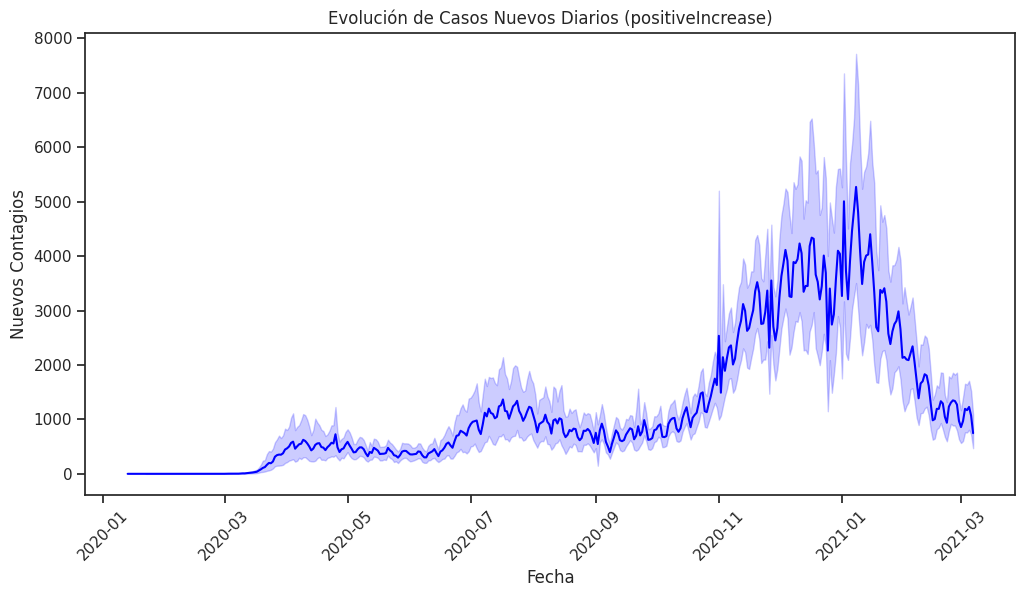

In [181]:
# Definimos el tamaño del "lienzo" (ancho, alto)
plt.figure(figsize=(12, 6))

# Dibujamos la línea: x es el tiempo, y es el aumento de casos
sns.lineplot(data=df, x='date', y='positiveIncrease', color='blue')

# Añadimos un título y etiquetas a los ejes
plt.title('Evolución de Casos Nuevos Diarios (positiveIncrease)')
plt.xlabel('Fecha')
plt.ylabel('Nuevos Contagios')

# Giramos las fechas del eje X para que no se amontonen y se lean bien
plt.xticks(rotation=45)

# Mostramos la gráfica final
plt.show()

Concepto positiveIncrease: Representa la "velocidad" del virus. Si la línea sube, el virus se propaga más rápido; si baja, la curva se está aplanando.

¿Por qué lineplot? Es el mejor para ver tendencias. Nos permite ver las "olas" o picos de contagio a través de los meses

#Impacto en la Mortalidad
Aquí observamos la consecuencia más grave de la pandemia: los fallecimientos diarios registrados.

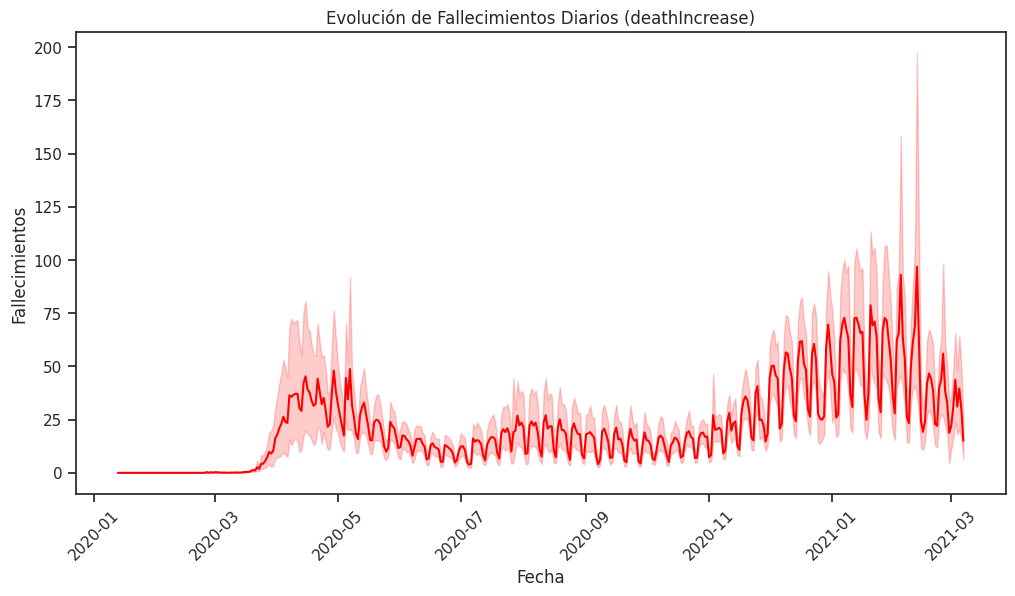

In [183]:
plt.figure(figsize=(12, 6))

# Aquí la variable clave es 'deathIncrease'
sns.lineplot(data=df, x='date', y='deathIncrease', color='red')

plt.title('Evolución de Fallecimientos Diarios (deathIncrease)')
plt.xlabel('Fecha')
plt.ylabel('Fallecimientos')
plt.xticks(rotation=45)

plt.show()

#Concepto deathIncrease: Son las muertes nuevas reportadas cada día.

Relación visual: Si comparas esta gráfica con la anterior, notarás que los picos rojos suelen ocurrir un poco después de los picos azules de contagios. A esto se le llama "desfase".

# Presión Hospitalaria

Esta gráfica es distinta porque no mide "nuevos casos", sino cuántas personas están ocupando una cama de hospital en un momento dado.


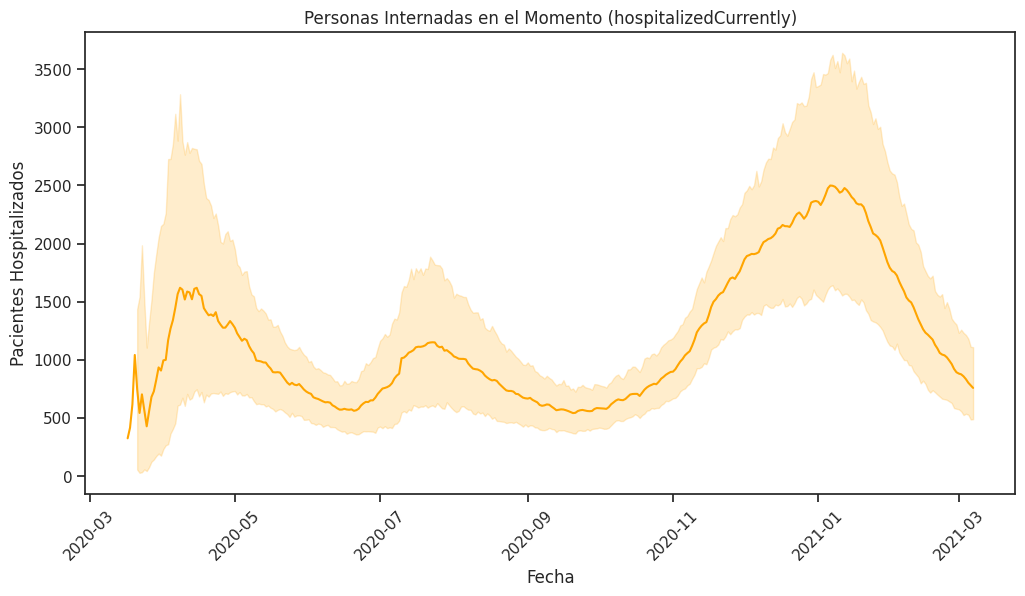

In [184]:
plt.figure(figsize=(12, 6))

# Usamos 'hospitalizedCurrently'
sns.lineplot(data=df, x='date', y='hospitalizedCurrently', color='orange')

plt.title('Personas Internadas en el Momento (hospitalizedCurrently)')
plt.xlabel('Fecha')
plt.ylabel('Pacientes Hospitalizados')
plt.xticks(rotation=45)

plt.show()

#Concepto hospitalizedCurrently
A diferencia de los "aumentos" (Increase), este es un estado actual. Es como una foto del hospital hoy: ¿cuántas camas están ocupadas?

Importancia: Sirve para entender si el sistema sanitario estaba saturado o si tenía capacidad de respuesta.